# 点が巡回するコード

<IPython.core.display.Javascript object>


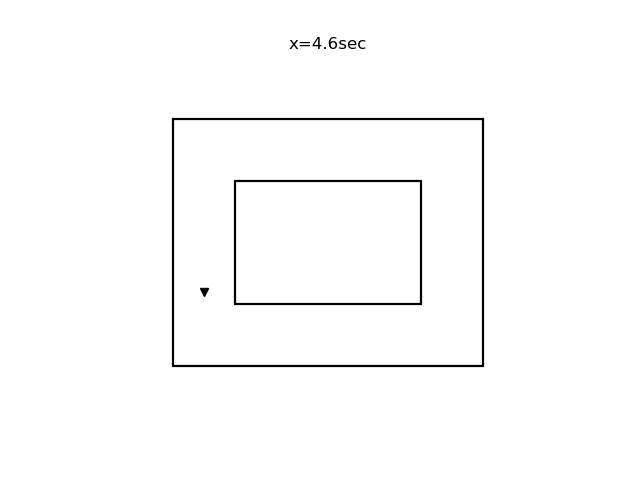

In [8]:
%matplotlib nbagg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.animation import PillowWriter,FuncAnimation

fig = plt.figure()
ax1 = fig.add_subplot(111)

A=np.array([-3,2])
B=np.array([-3,-2])
C=np.array([3,-2])
D=np.array([3,2])

AO=np.array([-5,4])
BO=np.array([-5,-4])
CO=np.array([5,-4])
DO=np.array([5,4])

p = pat.Polygon(xy = [A,B,C,D],
                edgecolor='black',
                facecolor='white',
                linewidth=1.6)

q = pat.Polygon(xy = [AO,BO,CO,DO],
                edgecolor='black',
                facecolor='white',
                linewidth=1.6)

#点の軌道
E=np.array([-4,3])
F=np.array([-4,-3])
G=np.array([4,-3])
H=np.array([4,3])

#表示領域
def initialize():
    ax1.set_xlim(-8,8)
    ax1.set_ylim(-6,6)
    ax1.add_patch(q)
    ax1.add_patch(p)

#点の軌道計算
def moveP(x):
    a = E
    b = np.array([0,-1])*x*velocity
    c = np.array([1,0])*(x-6)*velocity
    d = np.array([0,1])*(x-14)*velocity
    e = np.array([-1,0])*(x-20)*velocity
        
    if 0 == x:
        return a
    elif 0< x < 6: 
        return a + b
    elif 6<=x <14:
        return F + c
    elif 14<= x <20:
        return G + d
    elif 20<= x <28:
        return H + e
    else:
        return a
    
velocity=1.0
timestep=0.1

#アニメーション
def animate(t):
    plt.cla()
    initialize()

    x=timestep*t
    P=moveP(x)
    
    #xy座標を非表示
    plt.axis('off')
    #秒数表示
    plt.title('x=' + '{:.1f}'.format(x)+'sec')
    
    if 0 == x:
        return  ax1.plot(P[0],P[1],marker='o',color='black')
    elif 0< x < 6: 
        return  ax1.plot(P[0],P[1],marker='v',color='black')
    elif 6<=x <14:
        return  ax1.plot(P[0],P[1],marker='>',color='black')
    elif 14<= x <20:
        return  ax1.plot(P[0],P[1],marker='^',color='black')
    elif 20<= x <28:
        return  ax1.plot(P[0],P[1],marker='<',color='black')
    else:
        return  ax1.plot(P[0],P[1],marker='o',color='black')
    
#ax1.plot(P[0],P[1],marker='o',color='black')
    
anim = FuncAnimation(fig,animate,frames=300,repeat=True,interval=timestep*1000)
#frames:フレーム数。
#repeat:ループさせるかを決定する。Trueなのでループする。
#interval:10000で１秒間に１フレーム動くようになる。1000なので1秒間に10フレーム
plt.show()